# Your first deep neural network

# imports

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Flatten, Dense, Conv2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

from keras.datasets import cifar10

# data

In [14]:
NUM_CLASSES = 10

In [15]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [16]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [17]:
x_train[54, 12, 13, 1] 

0.36862746

# architecture

In [18]:
input_layer = Input((32,32,3))

x = Flatten()(input_layer)
x = Dense(150, activation = 'relu')(x)
x = Dense(200, activation = 'relu')(x)
x = Dense(150, activation = 'relu')(x)

output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)

model = Model(input_layer, output_layer)

In [19]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_5 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


# train

In [20]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [21]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True)

Epoch 1/10
50000/50000 [==============================] - 8s 162us/step - loss: 1.8490 - accuracy: 0.3328
Epoch 2/10
50000/50000 [==============================] - 8s 161us/step - loss: 1.6683 - accuracy: 0.4028
Epoch 3/10
50000/50000 [==============================] - 8s 161us/step - loss: 1.5917 - accuracy: 0.4315
Epoch 4/10
50000/50000 [==============================] - 8s 160us/step - loss: 1.5384 - accuracy: 0.4528
Epoch 5/10
50000/50000 [==============================] - 8s 161us/step - loss: 1.4976 - accuracy: 0.4661
Epoch 6/10
50000/50000 [==============================] - 8s 160us/step - loss: 1.4609 - accuracy: 0.4802
Epoch 7/10
50000/50000 [==============================] - 8s 161us/step - loss: 1.4376 - accuracy: 0.4907
Epoch 8/10
50000/50000 [==============================] - 8s 160us/step - loss: 1.4101 - accuracy: 0.4982
Epoch 9/10
50000/50000 [==============================] - 8s 163us/step - loss: 1.3885 - accuracy: 0.5047
Epoch 10/10
50000/50000 [=====================

# analysis

In [22]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 51us/step


[1.434540732383728, 0.49070000648498535]

In [23]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

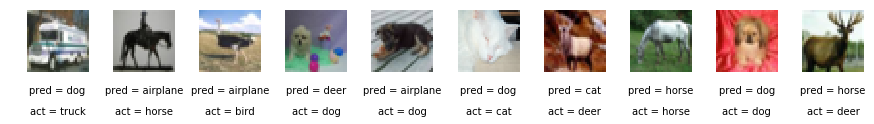

In [24]:

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)
